Importing the dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score

Numpy will be used to make arrays in python.
Panda is imported here to create the structured table, because we have file in csv format.
Since we are importing only a specific function thats why "from_import" is used
We have split our data into training & test data that's why train_test_split function is called.


Data Collection & Processing Part

In [60]:
#loading the csv data to a Pandas Dataframe
parkinsons_data = pd.read_csv('/content/parkinsons.csv') #it will read out data & store the data in dataframe

In [61]:
#head function will show first 5 rows of dataset
parkinsons_data.head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [62]:
# tail function will show last 5 rows of dataset
parkinsons_data.tail()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [63]:
#To see no. of rows & Colums in our dataset (rows,columns)
parkinsons_data.shape

(195, 24)

In [64]:
#For getting some info about the data
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             195 non-null    object 
 1   MDVP_Fo_Hz       195 non-null    float64
 2   MDVP_Fhi_Hz      195 non-null    float64
 3   MDVP_Flo_Hz      195 non-null    float64
 4   MDVP_Jitter      195 non-null    float64
 5   MDVP_Jitter_Abs  195 non-null    float64
 6   MDVP_RAP         195 non-null    float64
 7   MDVP_PPQ         195 non-null    float64
 8   Jitter_DDP       195 non-null    float64
 9   MDVP_Shimmer     195 non-null    float64
 10  MDVP_Shimmer_dB  195 non-null    float64
 11  Shimmer_APQ3     195 non-null    float64
 12  Shimmer_APQ5     195 non-null    float64
 13  MDVP_APQ         195 non-null    float64
 14  Shimmer_DDA      195 non-null    float64
 15  NHR              195 non-null    float64
 16  HNR              195 non-null    float64
 17  status          

In [65]:
#Checking for missing values (In case of missing value use imputation method)
parkinsons_data.isnull().sum()

name               0
MDVP_Fo_Hz         0
MDVP_Fhi_Hz        0
MDVP_Flo_Hz        0
MDVP_Jitter        0
MDVP_Jitter_Abs    0
MDVP_RAP           0
MDVP_PPQ           0
Jitter_DDP         0
MDVP_Shimmer       0
MDVP_Shimmer_dB    0
Shimmer_APQ3       0
Shimmer_APQ5       0
MDVP_APQ           0
Shimmer_DDA        0
NHR                0
HNR                0
status             0
RPDE               0
DFA                0
spread1            0
spread2            0
D2                 0
PPE                0
dtype: int64

In [66]:
# Statistical measures about the data
#25% means : 25% values are less than 48 in age coulumn
parkinsons_data.describe()


,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [67]:
# Checking the distribution of Target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

"0" means patient has no Parkinsons Disease

"1" means patient has Parkinsons Disease

In [68]:
#grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

<ipython-input-68-75067c7b398c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


 **Splitting the Features and Target**
When we are dropping a column in data, we give axis = 1
When we are dropping a row in data, we give axis = 0


In [69]:
X = parkinsons_data.drop(columns=['status','name'],axis=1) # Here I have loaded the data (With all columns except target coulumn)
Y = parkinsons_data['status'] # Storing target column in Y variable

In [70]:
# Checking target column is dropped or not
print(X)

     MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter  MDVP_Jitter_Abs  \
0       119.992      157.302       74.997      0.00784          0.00007   
1       122.400      148.650      113.819      0.00968          0.00008   
2       116.682      131.111      111.555      0.01050          0.00009   
3       116.676      137.871      111.366      0.00997          0.00009   
4       116.014      141.781      110.655      0.01284          0.00011   
..          ...          ...          ...          ...              ...   
190     174.188      230.978       94.261      0.00459          0.00003   
191     209.516      253.017       89.488      0.00564          0.00003   
192     174.688      240.005       74.287      0.01360          0.00008   
193     198.764      396.961       74.904      0.00740          0.00004   
194     214.289      260.277       77.973      0.00567          0.00003   

     MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  MDVP_Shimmer_dB  ...  \
0     0.00370   0.00554 

In [71]:
# Print the target column
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Now Splitting the data into Training data & Test Data

X_train : Contains features of all the training data
Y_train : Contains target of all the features present in X_train
X_test : Contains features of all the test data
Y_test : Contains traget of all the features present in X_test

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [73]:
# Here 80% data go into training & 20% data go for test
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(195, 22) (156, 22) (39, 22)
(195,) (156,) (39,)


**Model 1 : Logistic Regression**

In [74]:
# we are going to load one instance of Logistic Regresion Model into variable 'model', which I had imported from sklearn
model_1 = LogisticRegression()
# We are going to train out Logistic Regression model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_1.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_lr)
# Accuracy on Test data
X_train_prediction = model_1.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_lr)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_1.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.8717948717948718
Accuracy on Test Data :  0.8461538461538461
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Model 2 : Support Vector Machine

In [75]:
# we are going to load one instance of Support Vector Machine Model into variable 'model_2', which I had imported from sklearn
model_2 = svm.SVC(kernel='linear')
# We are going to train out Support Vector Machine model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_2.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_2.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_svm)
# Accuracy on Test data
X_train_prediction = model_2.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_svm)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_2.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.8653846153846154
Accuracy on Test Data :  0.8461538461538461
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Model 3 : Gaussian Naive Bayes

In [76]:
# we are going to load one instance of Gaussian Naive Bayes Model into variable 'model_3', which I had imported from sklearn
model_3 = GaussianNB()
# We are going to train out Gaussian Naive Bayes model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_3.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_3.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_gnb)
# Accuracy on Test data
X_train_prediction = model_3.predict(X_test)
test_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_gnb)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_3.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.7243589743589743
Accuracy on Test Data :  0.6666666666666666
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Model 4 : K-Nearest Neighbour

In [77]:
# we are going to load one instance of Gaussian Naive Bayes Model into variable 'model_4', which I had imported from sklearn
model_4 = KNeighborsClassifier(n_neighbors=16)
# We are going to train out KNeighborsClassifier model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_4.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_4.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_knn)
# Accuracy on Test data
X_train_prediction = model_4.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_knn)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_4.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.8076923076923077
Accuracy on Test Data :  0.8461538461538461
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Model 5 : Decision Tree

In [78]:
# We are going to load one instance of Decision Tree Model into variable 'model_5', which I had imported from sklearn
model_5 = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 4)
# We are going to train out Decision Tree model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_5.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_5.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_dt)
# Accuracy on Test data
X_train_prediction = model_5.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_dt)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_5.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.967948717948718
Accuracy on Test Data :  0.9230769230769231
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Model 6 : Random Forest Classifier

In [79]:
# We are going to load one instance of Random Forest Classifier Model into variable 'model_6', which I had imported from sklearn
model_6 = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=4)
# We are going to train out Random Forest Classifier model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_6.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_6.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_rf)
# Accuracy on Test data
X_train_prediction = model_6.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_rf)

input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_6.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

Accuracy on Training Data :  0.967948717948718
Accuracy on Test Data :  0.9230769230769231
[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [80]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','Gaussian Naive Bayes','K-Nearest Neighbour','Decision Tree','Random Forest'], 'Training Data Accuracy': [training_data_accuracy_lr*100,
                    training_data_accuracy_svm*100,training_data_accuracy_gnb*100,training_data_accuracy_knn*100,training_data_accuracy_dt*100,
                    training_data_accuracy_rf*100], 'Test Data Accuracy': [test_data_accuracy_lr*100,
                    test_data_accuracy_svm*100,test_data_accuracy_gnb*100,test_data_accuracy_knn*100,test_data_accuracy_dt*100,
                    test_data_accuracy_rf*100]})
model_ev

,Model,Training Data Accuracy,Test Data Accuracy
0,Logistic Regression,87.179487,84.615385
1,Support Vector Machine,86.538462,84.615385
2,Gaussian Naive Bayes,72.435897,66.666667
3,K-Nearest Neighbour,80.769231,84.615385
4,Decision Tree,96.794872,92.307692
5,Random Forest,96.794872,92.307692


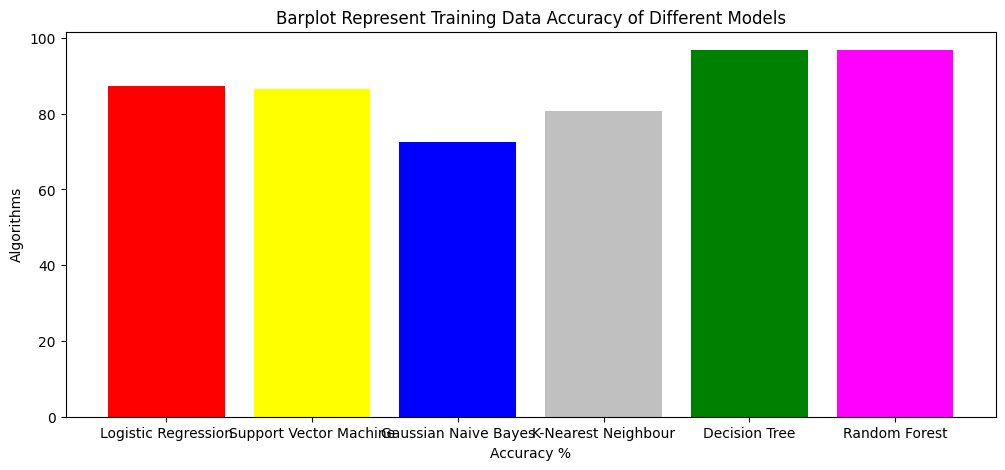

In [81]:
colors = ['red','yellow','blue','silver','green','magenta',]
plt.figure(figsize=(12,5))
plt.title("Barplot Represent Training Data Accuracy of Different Models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Training Data Accuracy'],color = colors)
plt.show()

Applying Ensemble Learning on all Models

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# voting classifier
final_model_1= VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model_1.fit(X_train, Y_train)

# prediction
prediction = final_model_1.predict(X_test)



# evaluation
accuracy = round(accuracy_score(Y_test, prediction) * 100, 3)
auc = round(roc_auc_score(Y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

 Accuracy: 84.615%
 AUC score: 0.766


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
final_model = VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model.fit(X_train.values, Y_train)

# prediction



input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

[1]
The Person has Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
import pickle  #This library is uesd to save the model

In [85]:
filename = 'trained_model_parkinsons.sav'
pickle.dump(final_model, open(filename,'wb')) #We are opening the file and writing the file in binary format, wb = writing in binary format

In [86]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model_parkinsons.sav','rb'))# rb = reading in binary format

**Just checking the final_model**

In [87]:
input_data = (119.99200,157.30200,74.99700,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped )
print(prediction)

if(prediction[0]==0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

[1]
The Person has Parkinsons Disease
